### TO DO:

1. create a program which produces up to the fourth moment for both the uniform and lognormal distribution **after** the relevant moment have been estimated using estimation()
2. specify a truncated lognormal distribution for the rate of return such that the maximal return that can be earned by a given household is defined by the GIC
    * If the life-cycle version of the model is ran, the GIC condition will include the survival probability; this should change the truncation of the distribution
3. rerun the PY and LC specifications of the model and compare the estimation results to: 
    * the uniform estimation of R-point and R-dist and 
    * the empirical evidence of the distribution of returns


## Goals of this Notebook

* Run the simplest specification of the estimation for Rfree
* Compare the results to CSTW... how "close" are the Lorenz sim points to the empirical counterpart?
* Compare the estimated distribution of Rfree to the "empirical counterpart" regarding heterogeneous returns, from the four empirical papers listed above

In [2]:
# This cell does some standard python setup!

import code.calibration as parameters
import warnings  # The warnings package allows us to ignore some harmless but alarming warning messages
from code.calibration import SCF_wealth, SCF_weights
from code.estimation import estimate

# Import related generic python packages
import matplotlib.pyplot as plt  # Plotting tools
import numpy as np
from HARK.utilities import get_lorenz_shares

warnings.filterwarnings("ignore")


def mystr(number):
    return f"{number:.4f}"

## Comparing the Estimation to Data on the Rate of Return

[1.02076914 1.02457412 1.02837909 1.03218407 1.03598905 1.03979403
 1.04359901]


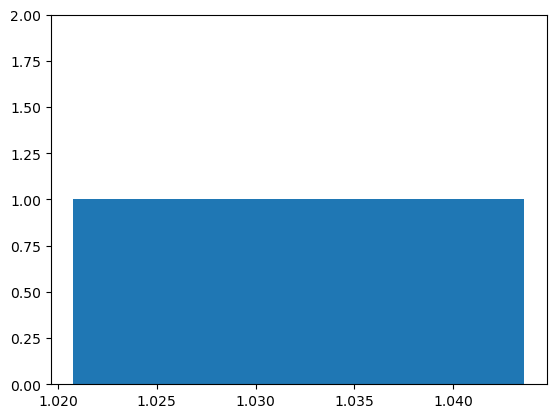

In [3]:
from HARK.distribution import Uniform

num_types = 7  # number of types we want
Rfree_mean = 1.0321840725453453  # center of Rfree distribution
Rfree_spread = 0.013317421431722095  # spread of Rfree distribution

est_Rfree_dstn = (
    Uniform(Rfree_mean - Rfree_spread, Rfree_mean + Rfree_spread)
    .discretize(num_types)
    .atoms.flatten()
)

print(est_Rfree_dstn)
ax = plt.gca()
ax.set_ylim([0, 2])
plt.hist(est_Rfree_dstn,bins=num_types)
plt.show()

[0.99694785 1.00008263 1.00321742 1.0063522  1.00948699 1.01262177
 1.01575655]


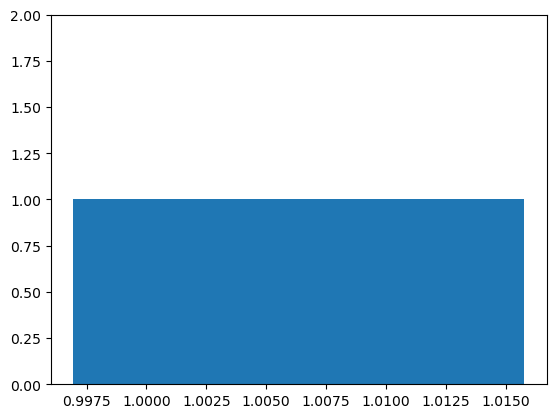

In [4]:
Rfree_LC_mean = 1.0063522012578616  # center of Rfree distribution
Rfree_LC_spread = 0.01097174439675312  # spread of Rfree distribution

est_Rfree_LC_dstn = (
    Uniform(Rfree_LC_mean - Rfree_LC_spread, Rfree_LC_mean + Rfree_LC_spread)
    .discretize(num_types)
    .atoms.flatten()
)

print(est_Rfree_LC_dstn)
ax = plt.gca()
ax.set_ylim([0, 2])
plt.hist(est_Rfree_LC_dstn,bins=num_types)
plt.show()

### Graph of the empirical distribution of safe and risky returns from Fagereng et al. (2015)

![Image Description](/Users/dc/Library/CloudStorage/OneDrive-JohnsHopkins/research/GitHub-forks/econ-ark/DistributionOfWealthMPC/DistEmpReturnsFagereng.png)



### Less restrictive assumptions for the estimated distribution of returns

# Estimation under Lognormal distribution of the rate of return

## Perpetual Youth - $\Rfree$-point model

In [ ]:
"""
This will run the absolute minimum amount of work that actually produces
relevant output-- no aggregate shocks, perpetual youth, matching net worth.
Will run both beta-point and beta-dist versions.
"""

"""
Copied here from do_min.py.
Design decisions about whether to include this code explicitly,
or import it, or execute it as is here, TBD.
"""

In [ ]:
# For speed here, use the "tractable" version of the model
# This is not the "right" model, but illustrates the key point
"""
This options file specifies parameter heterogeneity, making the choice in the paper:
uniformly distributed discount factors.
"""
param_name = "Rfree"  # Which parameter to introduce heterogeneity in
dist_type = "uniform"  # Which type of distribution to use

"""
This options file specifies the "standard" work options for cstwMPC, estimating the model only.
"""
run_estimation = True  # Runs the estimation if True
# Choose which sensitivity analyses to run: rho, xi_sigma, psi_sigma, mu, urate, mortality, g, R
run_sensitivity = [False, False, False, False, False, False, False, False]
# Computes K/Y ratio for a wide range of beta; should have do_beta_dist = False
find_beta_vs_KY = False
# Uses a "tractable consumer" rather than solving full model when True
do_tractable = True

# Solve for the $\beta-Point$ (do_param_dist=False) for speed
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""

do_param_dist = False  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
# Matches liquid assets data when True, net worth data when False
do_liquid = False

In [ ]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
}


EstimationEconomy = estimate(options, parameters)

In [ ]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth = EstimationEconomy.reap_state["aLvl"][0]
sim_Lorenz_points = get_lorenz_shares(sim_wealth, percentiles=pctiles)

print(sim_wealth)
print(EstimationEconomy.reap_state["aLvl"])

# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points, "-b", label="R-Point")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_1")

## Perpetual Youth - $\Rfree$-dist model

In [ ]:
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""
do_param_dist = True  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
do_liquid = False  # Matches liquid assets data when True, net worth data when False
do_tractable = False  #

In [ ]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
    "do_combo_estimation": True,
}


EstimationEconomy = estimate(options, parameters)

In [ ]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth = np.asarray(EstimationEconomy.reap_state["aLvl"]).flatten()
sim_wealth_2 = np.concatenate(EstimationEconomy.reap_state["aLvl"])
sim_Lorenz_points_2 = get_lorenz_shares(sim_wealth_2, percentiles=pctiles)
print(sim_wealth)
print(EstimationEconomy.reap_state["aLvl"])
print(np.concatenate(EstimationEconomy.reap_state["aLvl"]))



In [ ]:
# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points_2, "-b", label="R-Dist")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_2")

## Life-cycle version of the model

We are interested in comparing the estimated distribution of the rate of return across households to measurements of its empirical counterpart. To be sure that the two objects of interest are comparable, we reestimate the life-cycle version of the model. It should be the case that a wider distribution of return is needed to match the empirical wealth targets, since wealth cannot grow without bounds under the assumption of a finite lifetime for households.

### $\Rfree$-point model

In [ ]:
do_param_dist = False  
do_lifecycle = True  
do_agg_shocks = False  
do_liquid = False  
do_tractable = True  

In [ ]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
    "do_combo_estimation": True,
}


EstimationEconomy = estimate(options, parameters)

In [ ]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth = EstimationEconomy.reap_state["aLvl"][0]
sim_Lorenz_points = get_lorenz_shares(sim_wealth, percentiles=pctiles)

# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points, "-b", label="R-Point-LC")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_3")


### $\Rfree$-dist model

In [ ]:
do_param_dist = True  
do_lifecycle = True  
do_agg_shocks = False  
do_liquid = False  
do_tractable = False  

In [ ]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
    "do_combo_estimation": True,
}


EstimationEconomy = estimate(options, parameters)

In [ ]:
# Plot
pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

#sim_wealth = np.asarray(EstimationEconomy.reap_state["aLvl"]).flatten()
sim_wealth_4 = np.concatenate(EstimationEconomy.reap_state["aLvl"])
print(np.asarray(EstimationEconomy.reap_state["aLvl"]).shape)
print(sim_wealth_4.shape)
sim_Lorenz_points_4 = get_lorenz_shares(sim_wealth_4, percentiles=pctiles)

plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points_4, "-b", label="R-Dist-LC")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_4")